In [1]:
# ==================================================================================
# Diplomado en Estadística Aplicada a la Toma de Decisiones con Lenguaje R y Python
# Universidad Privada Boliviana
# ----------------------------------------------------------------------------------
#   MODELOS PREDICTIVOS PARA LA TOMA DE DECISIONES ESTRATEGICAS
# ----------------------------------------------------------------------------------
#         Enrique Alejandro Laurel Cossio, Mayo 2025
# ==================================================================================
#                      REGRESIÓN LOGÍSTICA
# ==================================================================================

In [2]:
# Cargamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
# cargamos datos
url='https://raw.githubusercontent.com/ealaurel/MODELOS_PREDICTIVOS_202505/main/data/ifood_df.csv'
ifood_df = pd.read_csv(url,sep=',', encoding='iso-8859-1')

print(ifood_df.shape) #
ifood_df.head(2)

(2205, 39)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0


# 1. Exploración de Datos

In [4]:
ifood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

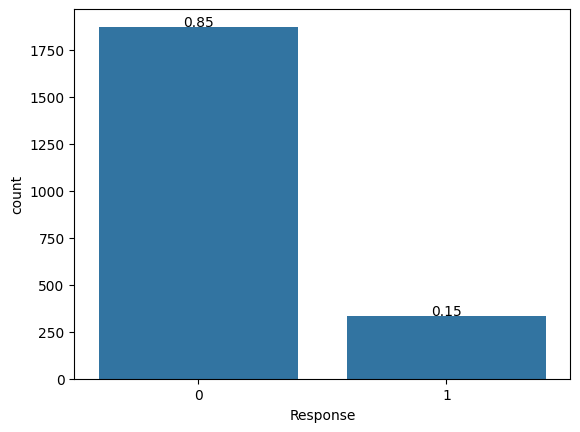

In [5]:
ax = sns.countplot(x='Response', data=ifood_df)
total = float(len(ifood_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

In [6]:
# una copia a los datos
df = ifood_df.copy()

In [7]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [8]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


# 2. Entrenamiento del Modelo

In [9]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [10]:
df.Response.unique()

array([1, 0])

In [11]:
# hacer una matriz de correlación de las variables de df y graficarlas
df.corr()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
Income,1.000000,-0.531699,0.042483,0.006716,0.730495,0.537920,0.702500,0.551758,0.555601,0.417653,...,-0.001960,0.044336,-0.060621,-0.239604,0.017644,0.021633,0.091176,0.823066,0.816879,0.388247
Kidhome,-0.531699,1.000000,-0.040207,0.011829,-0.499288,-0.374388,-0.445665,-0.389895,-0.379101,-0.356550,...,0.007422,-0.072244,0.019050,0.055308,-0.001930,0.011482,-0.042031,-0.551152,-0.539828,-0.212080
Teenhome,0.042483,-0.040207,1.000000,0.013881,0.002783,-0.176925,-0.267177,-0.206371,-0.164246,-0.019619,...,0.027181,0.047962,-0.056259,-0.120519,-0.024698,0.023806,0.092901,-0.142995,-0.146866,-0.130255
Recency,0.006716,0.011829,0.013881,1.000000,0.016470,-0.004909,0.026138,0.001177,0.025535,0.018558,...,0.023908,-0.001348,-0.006789,-0.003093,0.031419,-0.025563,-0.009234,0.021132,0.020241,-0.013344
MntWines,0.730495,-0.499288,0.002783,0.016470,1.000000,0.384947,0.593119,0.395967,0.388613,0.390194,...,0.005915,0.034139,-0.096259,-0.140369,-0.060920,0.036403,0.160804,0.902310,0.901848,0.509913
MntFruits,0.537920,-0.374388,-0.176925,-0.004909,0.384947,1.000000,0.568100,0.592556,0.570986,0.392596,...,-0.014210,0.025961,0.025452,-0.060915,0.114919,-0.055581,-0.084301,0.606658,0.594180,0.155133
MntMeatProducts,0.702500,-0.445665,-0.267177,0.026138,0.593119,0.568100,1.000000,0.595673,0.556511,0.375581,...,-0.004064,0.017370,-0.041738,-0.111968,0.064917,-0.004020,-0.004194,0.861392,0.860663,0.319553
MntFishProducts,0.551758,-0.389895,-0.206371,0.001177,0.395967,0.592556,0.595673,1.000000,0.582974,0.425420,...,0.015502,0.041886,0.061304,-0.059840,0.106227,-0.050153,-0.103952,0.635038,0.620626,0.174675
MntSweetProducts,0.555601,-0.379101,-0.164246,0.025535,0.388613,0.570986,0.556511,0.582974,1.000000,0.355747,...,-0.011220,0.049347,0.060550,-0.057863,0.104075,-0.067723,-0.085702,0.604514,0.595394,0.200174
MntGoldProds,0.417653,-0.356550,-0.019619,0.018558,0.390194,0.392596,0.375581,0.425420,0.355747,1.000000,...,-0.010375,0.043096,0.019189,-0.065014,0.131759,-0.032492,-0.119708,0.463694,0.388776,0.194647


In [12]:
df[['Response','Complain']].corr()

,Response,Complain
Response,1.000000,-0.000273
Complain,-0.000273,1.000000


In [13]:
df[['MntWines','MntRegularProds','Kidhome','Recency','education_Basic','Response']].corr()

,MntWines,MntRegularProds,Kidhome,Recency,education_Basic,Response
MntWines,1.000000,0.901848,-0.499288,0.016470,-0.140369,0.245559
MntRegularProds,0.901848,1.000000,-0.539828,0.020241,-0.138087,0.262363
Kidhome,-0.499288,-0.539828,1.000000,0.011829,0.055308,-0.078409
Recency,0.016470,0.020241,0.011829,1.000000,-0.003093,-0.200413
education_Basic,-0.140369,-0.138087,0.055308,-0.003093,1.000000,-0.050437
Response,0.245559,0.262363,-0.078409,-0.200413,-0.050437,1.000000


In [ ]:
df.shape

(2205, 39)

In [ ]:
# seleccionamos variables explicativas y variables dependiente
X = df[[
       # seleccione las variables para mejorar la predicción
 ]]
y = df['Response']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# entrenamiento 80% y data de testeo un 20%
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , test_size=# introduzca la partición de testeo
                                                    , random_state=# introduzca la semilla
                                                    )

In [ ]:
# Ajusta el modelo de regresión logística
modelo_logit = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.389095
         Iterations 7


# 3. Resultados del Modelo

In [ ]:
# Muestra un resumen del modelo
print(modelo_logit.summary())

                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1764
Model:                          Logit   Df Residuals:                     1760
Method:                           MLE   Df Model:                            3
Date:                Sat, 24 May 2025   Pseudo R-squ.:                 0.05592
Time:                        01:28:37   Log-Likelihood:                -686.36
converged:                       True   LL-Null:                       -727.02
Covariance Type:            nonrobust   LLR p-value:                 1.606e-17
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
MntRegularProds     0.0006      0.000      5.248      0.000       0.000       0.001
Kidhome            -0.5346      0.129     -4.145      0.000      -0.787      -0.282
Recency            -0.0399      

In [ ]:
# evaluando los p valores
# regla de decisión: si p_valor<=0.05 entonces la variable es importante para la variable respuesta.

In [ ]:
# prediccion
y_pred_train = modelo_logit.predict(X_train)
y_pred_train.head(2)

,0
415,0.044692
1609,0.132697


In [ ]:
X_train.shape

(1764, 4)

In [ ]:
# Calcula la exactitud del modelo en el entrenamiento
# y_train: valores verdadaderos
# y_pred: valores predichos
exactitud_train = accuracy_score(y_train, (y_pred_train>0.5).astype(int))
print("exactitud del modelo:", exactitud_train)

exactitud del modelo: 0.8395691609977324


# 4. Predicción

In [ ]:
# Realiza predicciones en el conjunto de datos de prueba
y_pred = modelo_logit.predict(X_test)
y_pred

,0
48,0.065869
193,0.017433
1824,0.176872
2038,0.175467
380,0.071457
...,...
549,0.066806
660,0.403941
1361,0.641312
480,0.090864


In [ ]:
exactitud_test = accuracy_score(y_test, (y_pred>0.5).astype(int))
print("Exactitud del modelo:", exactitud_test)

Precisión del modelo: 0.81859410430839


In [ ]:
# obtener una Exactitud superior a 0.8185